# Apple Watch Activity Data

# Presentation of the data

Health Data on iPhone allows us to connect with the Apple Watch Activity in order to generate XML Files containing the summary of our workout and daily activity. 
In this notebook, we will focus on the generation of workout data using the Activity App .
Those XML Files contain various data, that we first need to transform to csv files and to class based on their nature using a csv parser.


# I-Parse the XML Files

In [ ]:
%run -i 'apple-health-data-parser' 'export.xml'

In [1]:
#Useful imports
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

# II- More insight about the csv files

### A) Active Energy

It gives us the amount of calories burned between a certain period of time.

In [3]:
pd.read_csv('ActiveEnergyBurned.csv').head()[['sourceName','startDate','value']]

,sourceName,startDate,value
0,Tazi’s Apple Watch,2019-01-11 03:18:29 +0100,0.196
1,Tazi’s Apple Watch,2019-01-11 03:20:11 +0100,0.161
2,Tazi’s Apple Watch,2019-01-11 03:24:07 +0100,0.068
3,Tazi’s Apple Watch,2019-01-11 03:26:40 +0100,0.228
4,Tazi’s Apple Watch,2019-01-11 03:27:42 +0100,0.034


### B)Activity Summary

It gives a daily summary about the burned energy

In [222]:
pd.read_csv('ActivitySummary.csv').tail()

,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
22,2019-03-01,798.682,1030,kcal,96,30,10,12
23,2019-03-02,233.788,1030,kcal,15,30,2,12
24,2019-03-03,776.017,1030,kcal,111,30,6,12
25,2019-03-04,891.902,1030,kcal,102,30,12,12
26,2019-03-05,66.949,1030,kcal,7,30,2,12


### C) Workout

It is a summary of the workouts

In [223]:
pd.read_csv('Workout.csv').head()

,sourceName,sourceVersion,device,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit
0,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x28312c690>, name:Apple Watch, ma...",2019-02-13 08:14:38 +0100,2019-02-13 06:55:48 +0100,2019-02-13 08:14:37 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,78.811034,min,0.0,mi,411.232023,kcal
1,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c7d0>, name:Apple Watch, ma...",2019-02-14 08:04:56 +0100,2019-02-14 06:55:57 +0100,2019-02-14 08:04:55 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,68.970537,min,0.0,mi,347.114252,kcal
2,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c910>, name:Apple Watch, ma...",2019-02-15 08:31:15 +0100,2019-02-15 07:24:43 +0100,2019-02-15 08:31:14 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,66.517247,min,0.0,mi,363.965813,kcal
3,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312ca50>, name:Apple Watch, ma...",2019-02-16 10:07:56 +0100,2019-02-16 09:03:21 +0100,2019-02-16 10:07:56 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,64.576226,min,0.0,mi,239.544231,kcal
4,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312caf0>, name:Apple Watch, ma...",2019-02-17 10:27:09 +0100,2019-02-17 09:02:07 +0100,2019-02-17 10:27:08 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,85.015941,min,0.0,mi,343.755844,kcal


### D) Heart Rate Variability

Very useful information for fatigue monitoring measuring variation in the time interval between heartbeats.
Unfortunately it can not be used because of the lack of data generated for the HRV with the Apple Watch.
It is however a very useful indicator of our health and potential fatigue risks

In [224]:
pd.read_csv('HeartRateVariabilitySDNN.csv').head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c910>, name:Apple Watch, ma...",HeartRateVariabilitySDNN,ms,2019-02-14 09:16:08 +0100,2019-02-14 09:15:03 +0100,2019-02-14 09:16:08 +0100,71.6955
1,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c730>, name:Apple Watch, ma...",HeartRateVariabilitySDNN,ms,2019-02-16 14:10:38 +0100,2019-02-16 14:09:27 +0100,2019-02-16 14:10:38 +0100,157.0610
2,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c370>, name:Apple Watch, ma...",HeartRateVariabilitySDNN,ms,2019-02-26 16:37:10 +0100,2019-02-26 16:36:05 +0100,2019-02-26 16:37:10 +0100,98.2885
3,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c690>, name:Apple Watch, ma...",HeartRateVariabilitySDNN,ms,2019-02-28 12:01:43 +0100,2019-02-28 12:00:32 +0100,2019-02-28 12:01:43 +0100,243.1540
4,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312c280>, name:Apple Watch, ma...",HeartRateVariabilitySDNN,ms,2019-03-02 10:43:13 +0100,2019-03-02 10:42:07 +0100,2019-03-02 10:43:13 +0100,83.5000


### E) Heart Rate


This is the data measuring my heart rate. Later on, we will focus on this dataset but only during workouts 

In [225]:
pd.read_csv('HeartRate.csv').head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x2831c3980>, name:Apple Watch, ma...",HeartRate,count/min,2019-02-12 14:57:19 +0100,2019-02-12 14:54:08 +0100,2019-02-12 14:54:08 +0100,57.0
1,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x2831c3480>, name:Apple Watch, ma...",HeartRate,count/min,2019-02-12 14:58:37 +0100,2019-02-12 14:58:36 +0100,2019-02-12 14:58:36 +0100,102.0
2,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x2831c37a0>, name:Apple Watch, ma...",HeartRate,count/min,2019-02-12 14:58:41 +0100,2019-02-12 14:58:40 +0100,2019-02-12 14:58:40 +0100,56.0
3,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x2831c56d0>, name:Apple Watch, ma...",HeartRate,count/min,2019-02-12 14:58:46 +0100,2019-02-12 14:58:45 +0100,2019-02-12 14:58:45 +0100,56.0
4,Tazi’s Apple Watch,5.1.2,"<<HKDevice: 0x2831c5630>, name:Apple Watch, ma...",HeartRate,count/min,2019-02-12 14:58:51 +0100,2019-02-12 14:58:48 +0100,2019-02-12 14:58:48 +0100,57.0



### F) Others

There are other csv files such as distance , bodymass ,...

## II) Heart Rate During Workout

We will first start by adding two masks in order to get the workout time from 7 to 8 am
during weekdays and from 9 to 10 am during weekends

In [226]:
### Some preprocess to the dataframe to get time indexes and hours
df=pd.read_csv('HeartRate.csv')
df[['creationDate','startDate','endDate']]=df[['creationDate','startDate','endDate']].apply(pd.to_datetime,errors='coerce',format='%Y-%m-%d %H:%M:%S.%f')
df=df[['startDate','value']]
df.set_index('startDate',inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,value
startDate,
2019-02-12 13:54:08,57.0
2019-02-12 13:58:36,102.0
2019-02-12 13:58:40,56.0
2019-02-12 13:58:45,56.0
2019-02-12 13:58:48,57.0


### For weekdays:

In [227]:
mask=(df.index.hour>6) & (df.index.hour<8)
df_week_days=df[mask]
df_week_days.tail()

,value
startDate,
2019-03-05 07:36:28,67.0
2019-03-05 07:40:28,62.0
2019-03-05 07:46:55,72.0
2019-03-05 07:50:53,59.0
2019-03-05 07:56:59,56.0


# For Week-ends:

In [228]:
mask=(df.index.hour>8) & (df.index.hour<10)
df_weekend=df[mask]
df_weekend.head()

,value
startDate,
2019-02-14 09:01:33,55.0
2019-02-14 09:03:02,52.0
2019-02-14 09:10:38,55.0
2019-02-14 09:13:37,55.0
2019-02-14 09:17:14,68.0


<IPython.core.display.Javascript object>


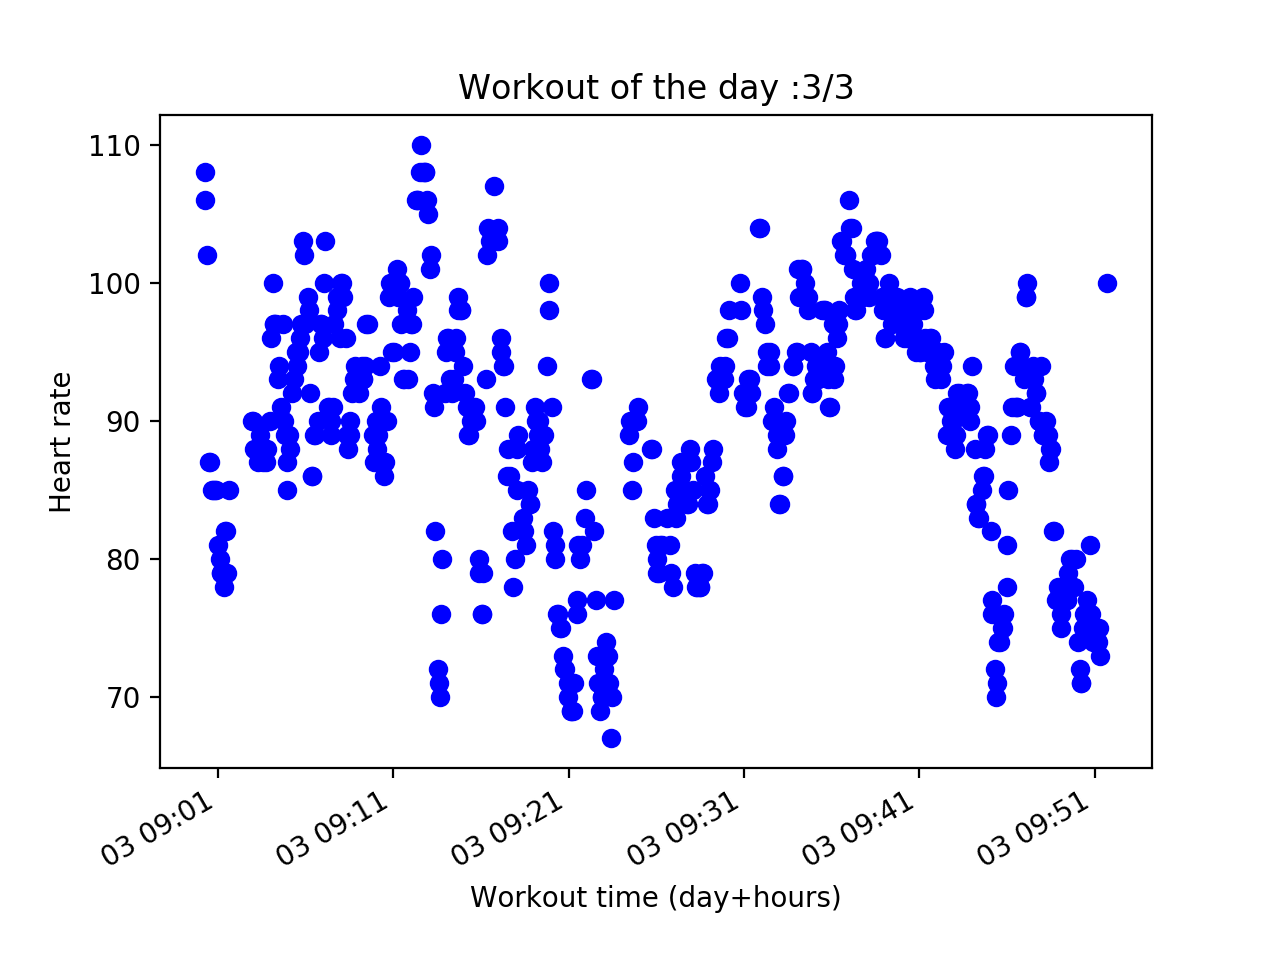

<IPython.core.display.Javascript object>


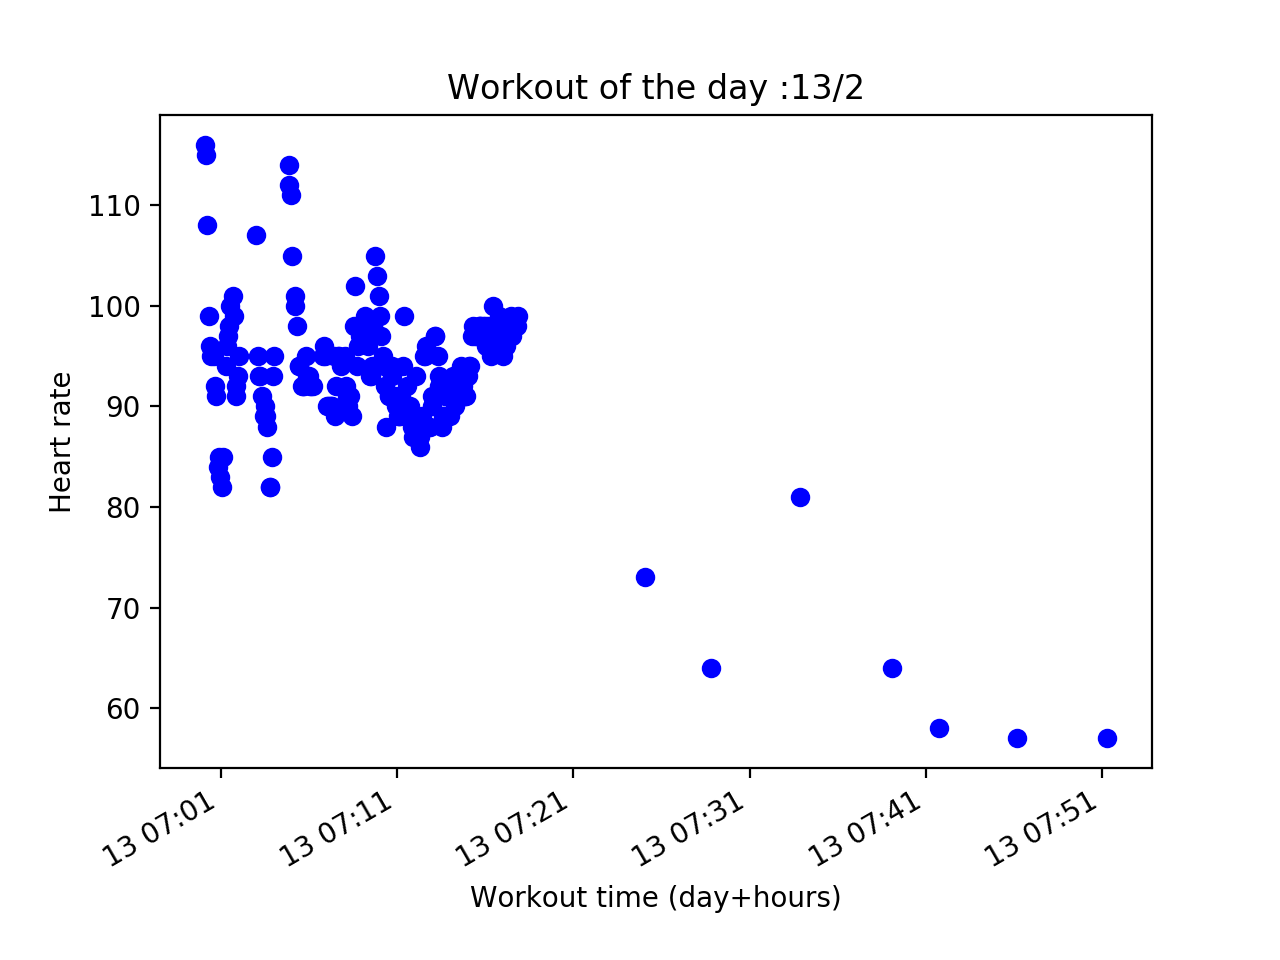

<IPython.core.display.Javascript object>


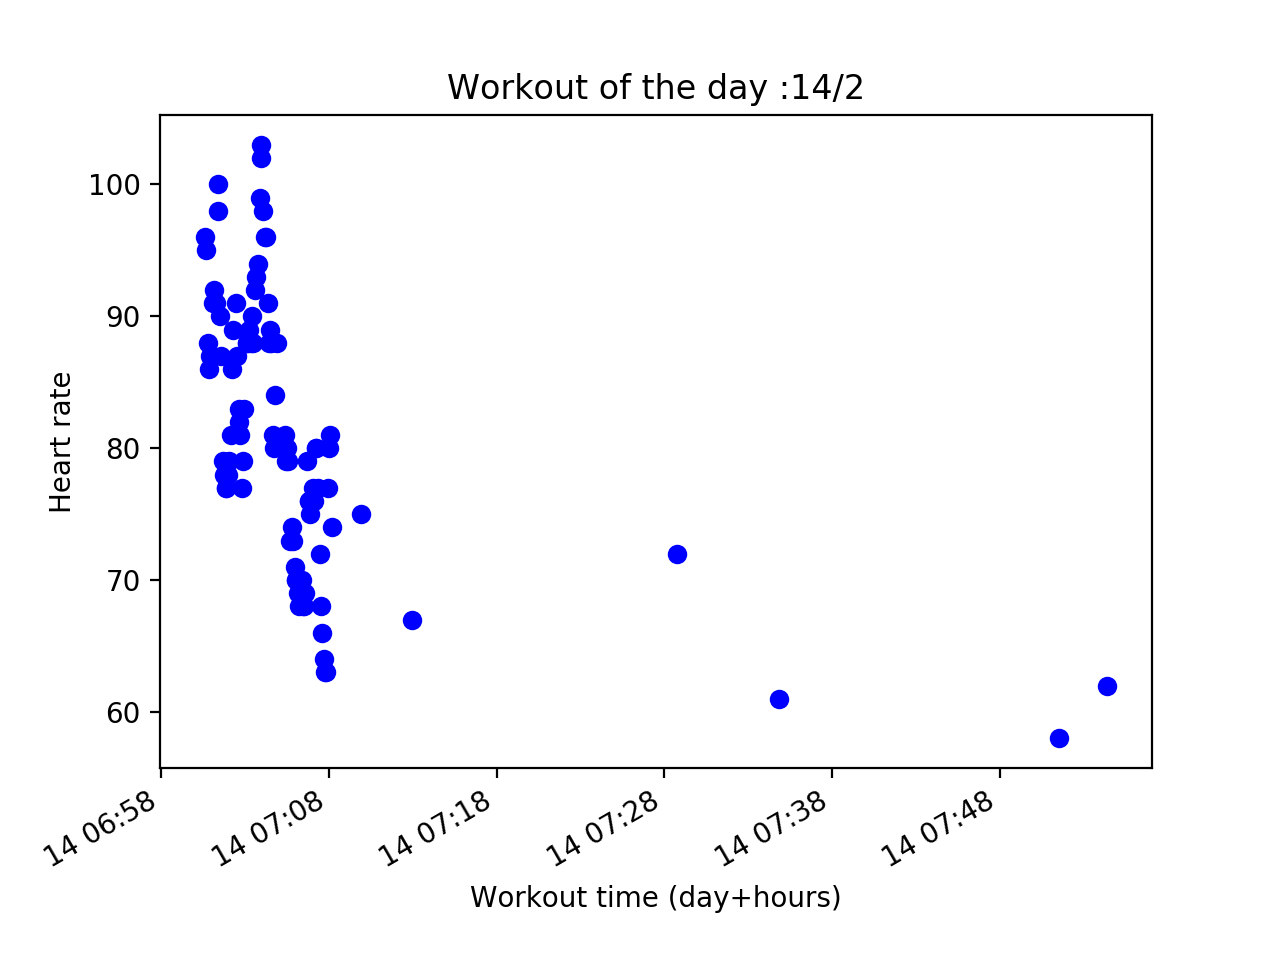

<IPython.core.display.Javascript object>


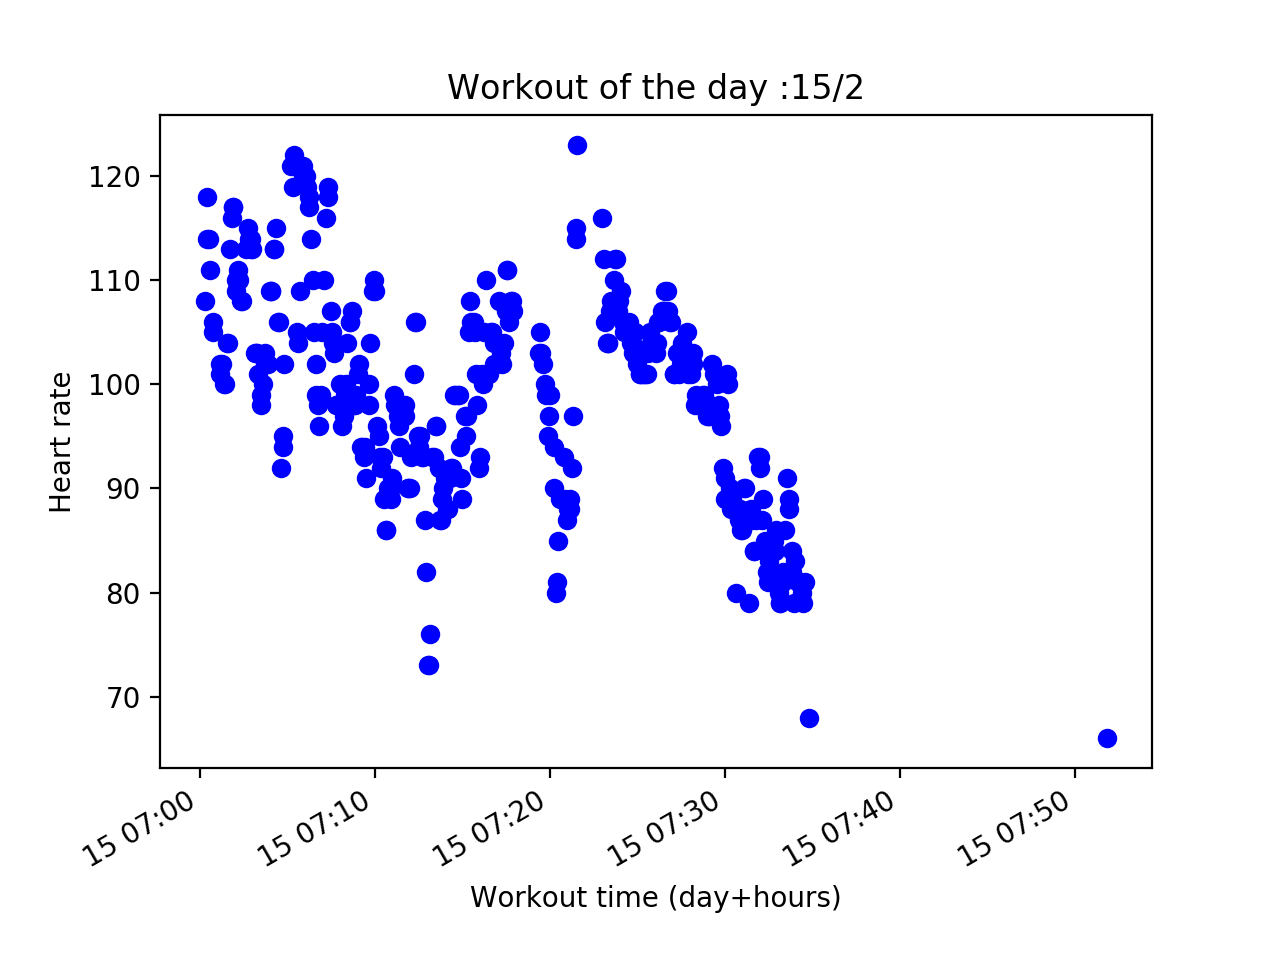

<IPython.core.display.Javascript object>


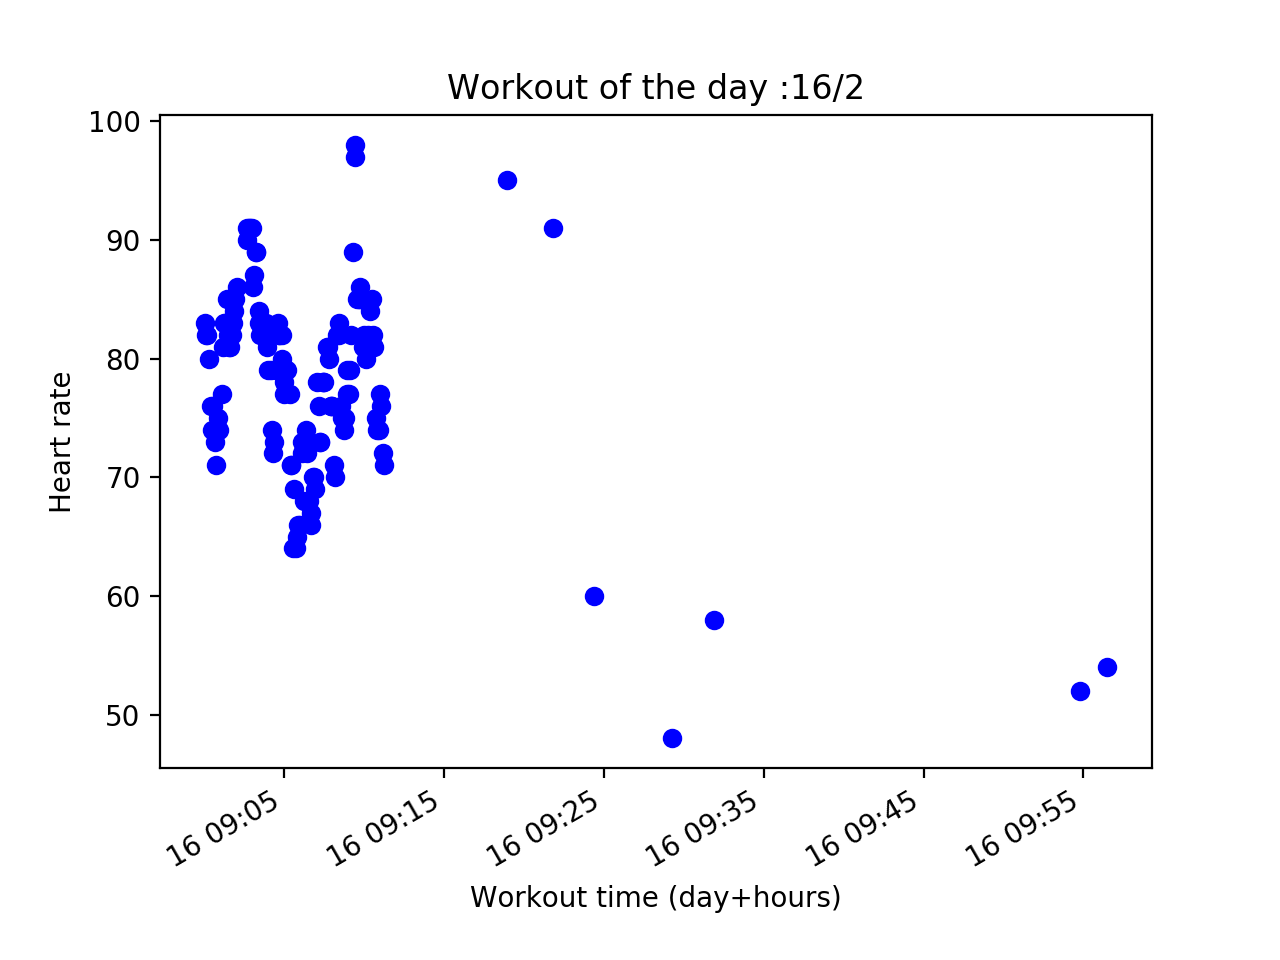

<IPython.core.display.Javascript object>


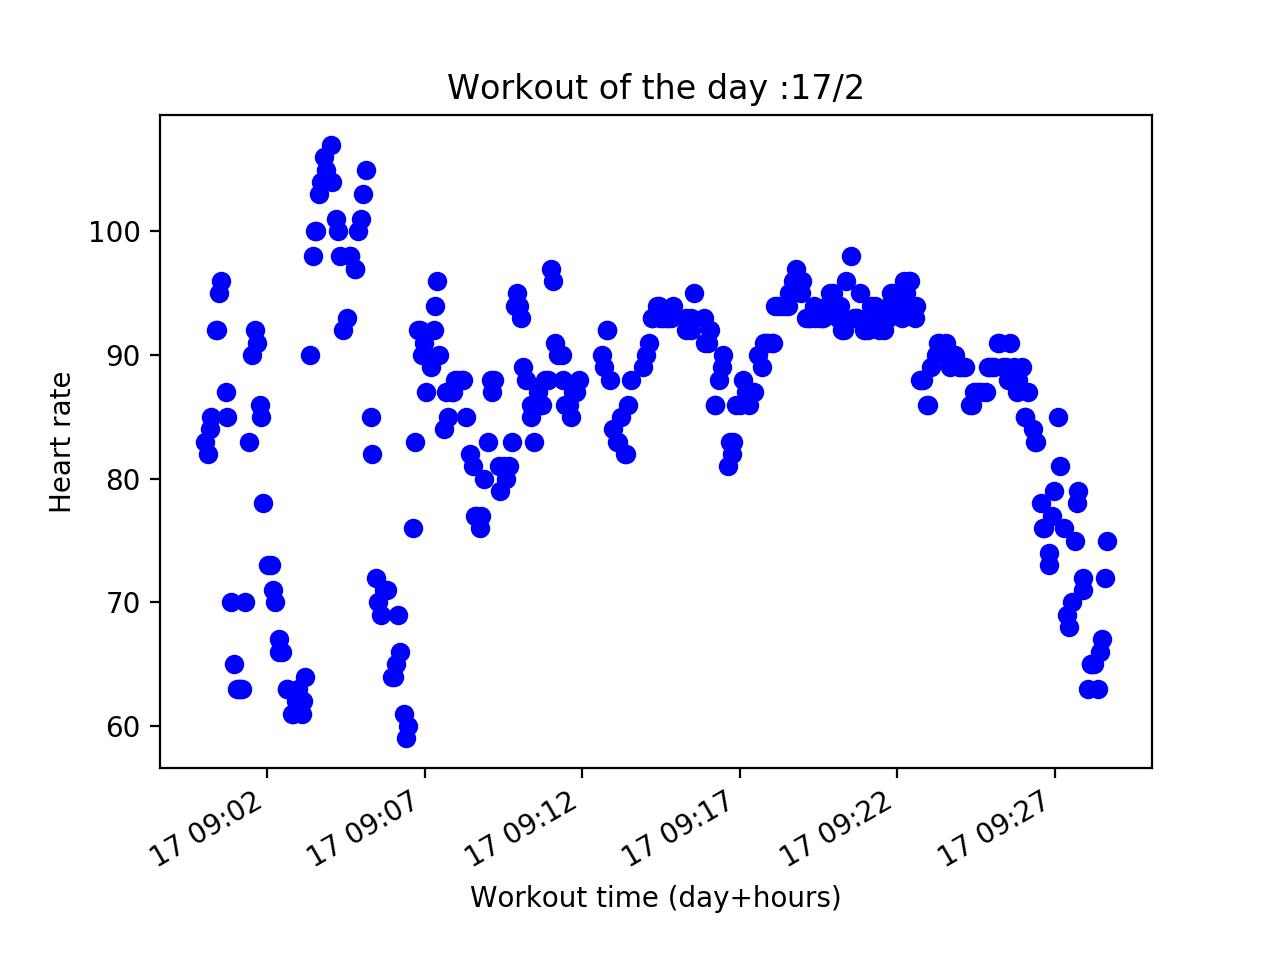

<IPython.core.display.Javascript object>


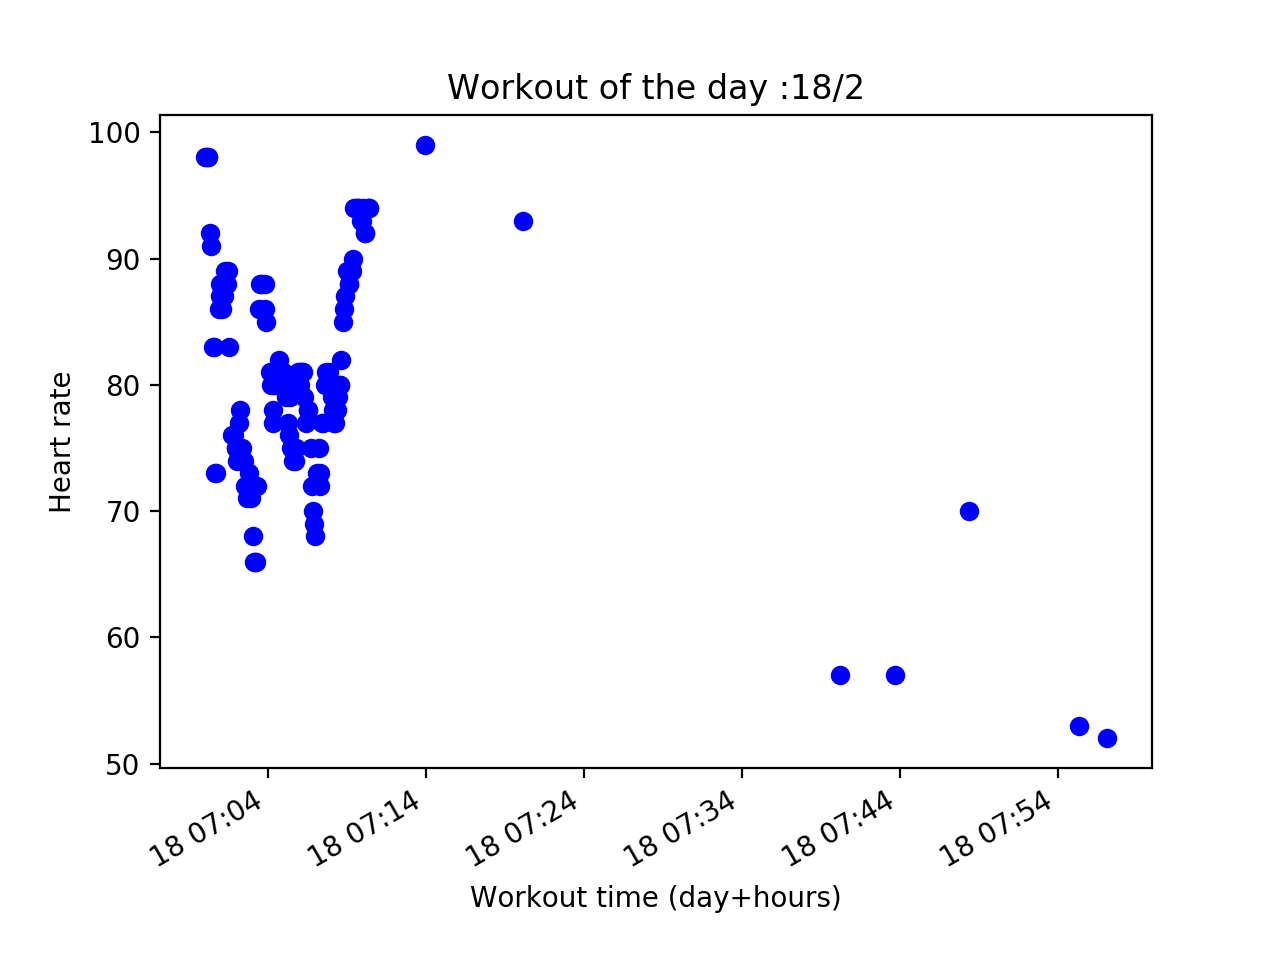

<IPython.core.display.Javascript object>


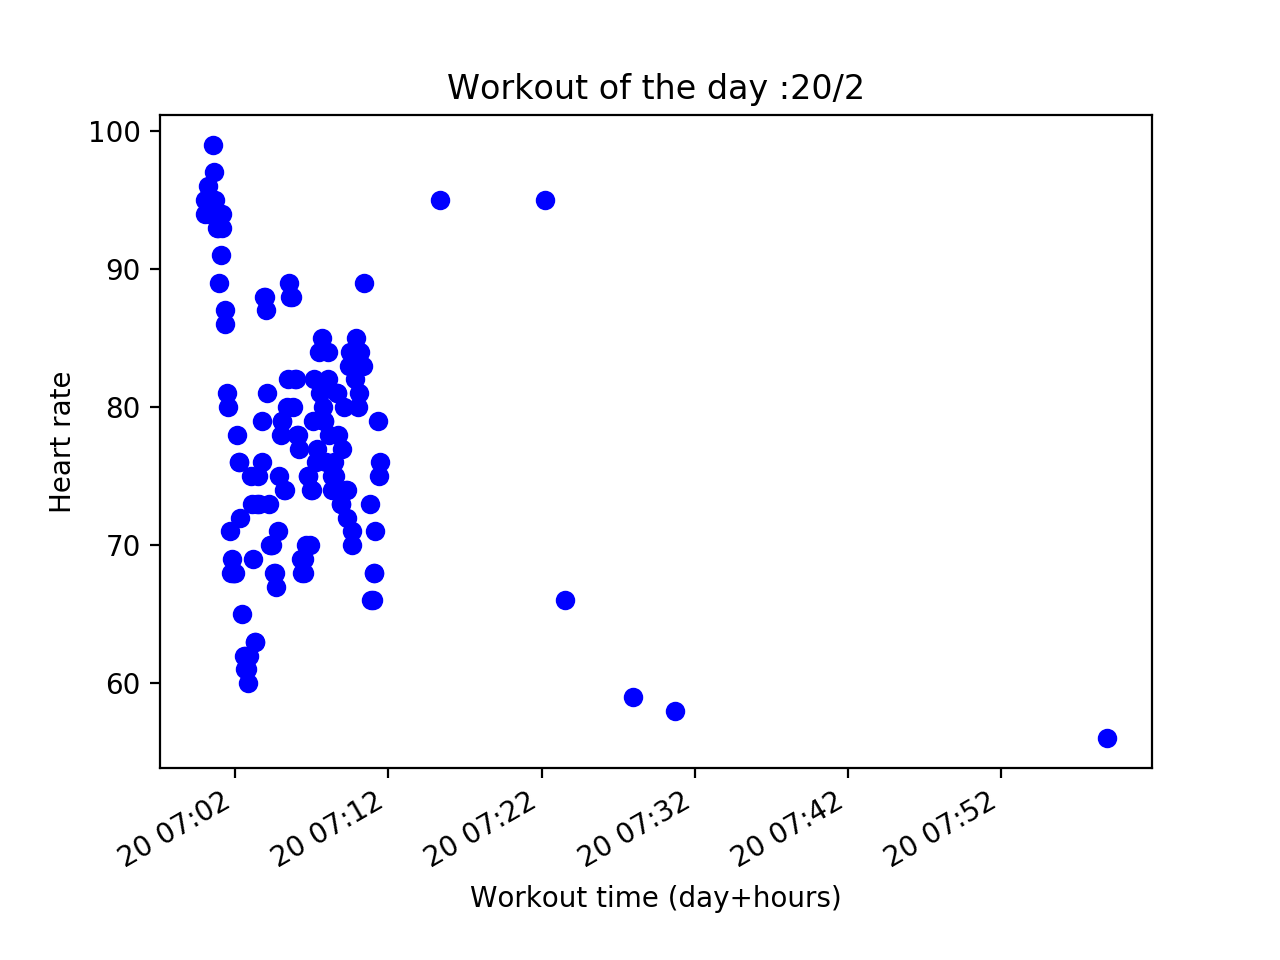

<IPython.core.display.Javascript object>


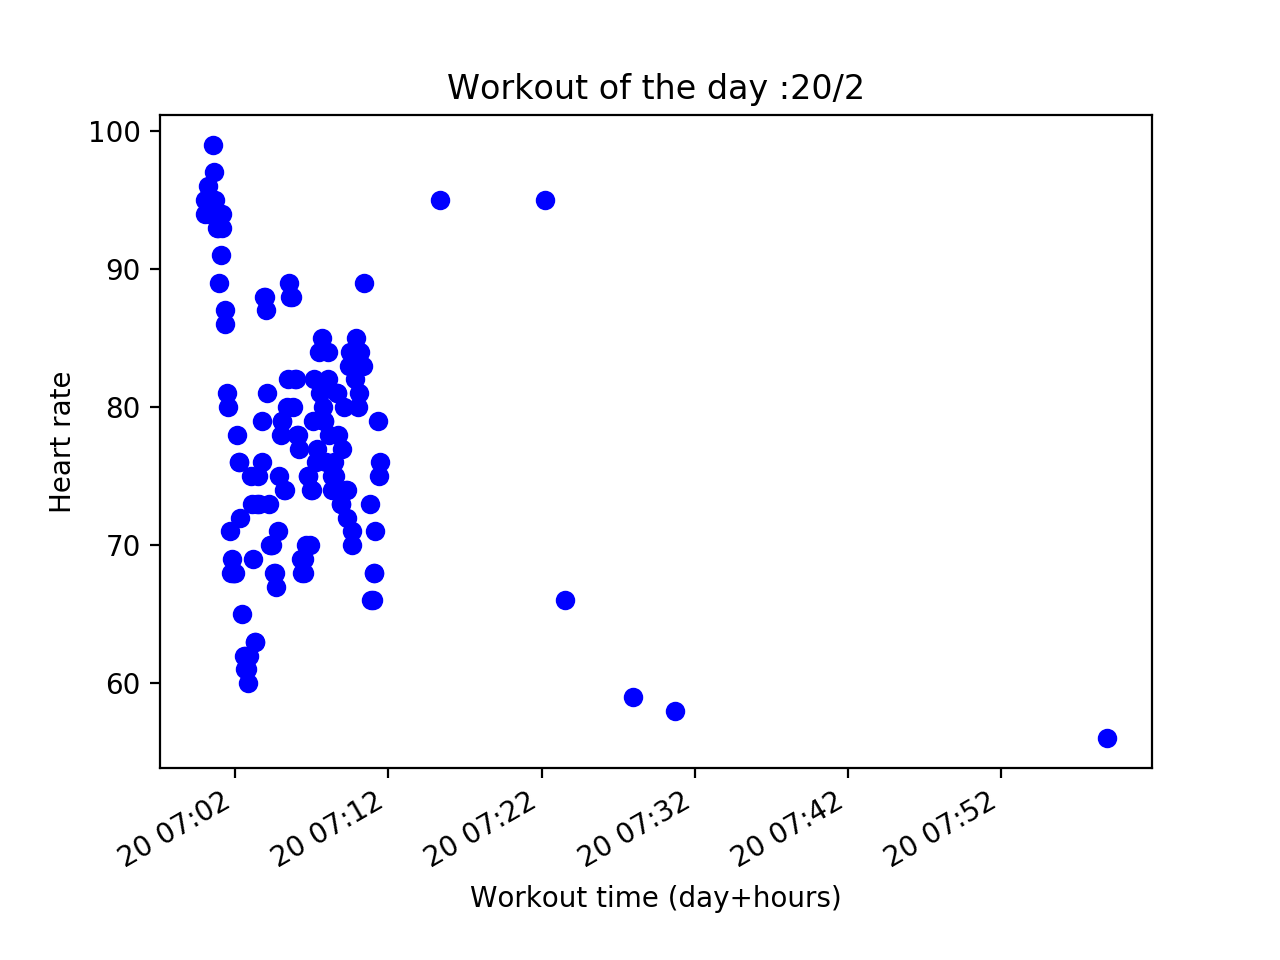

<IPython.core.display.Javascript object>


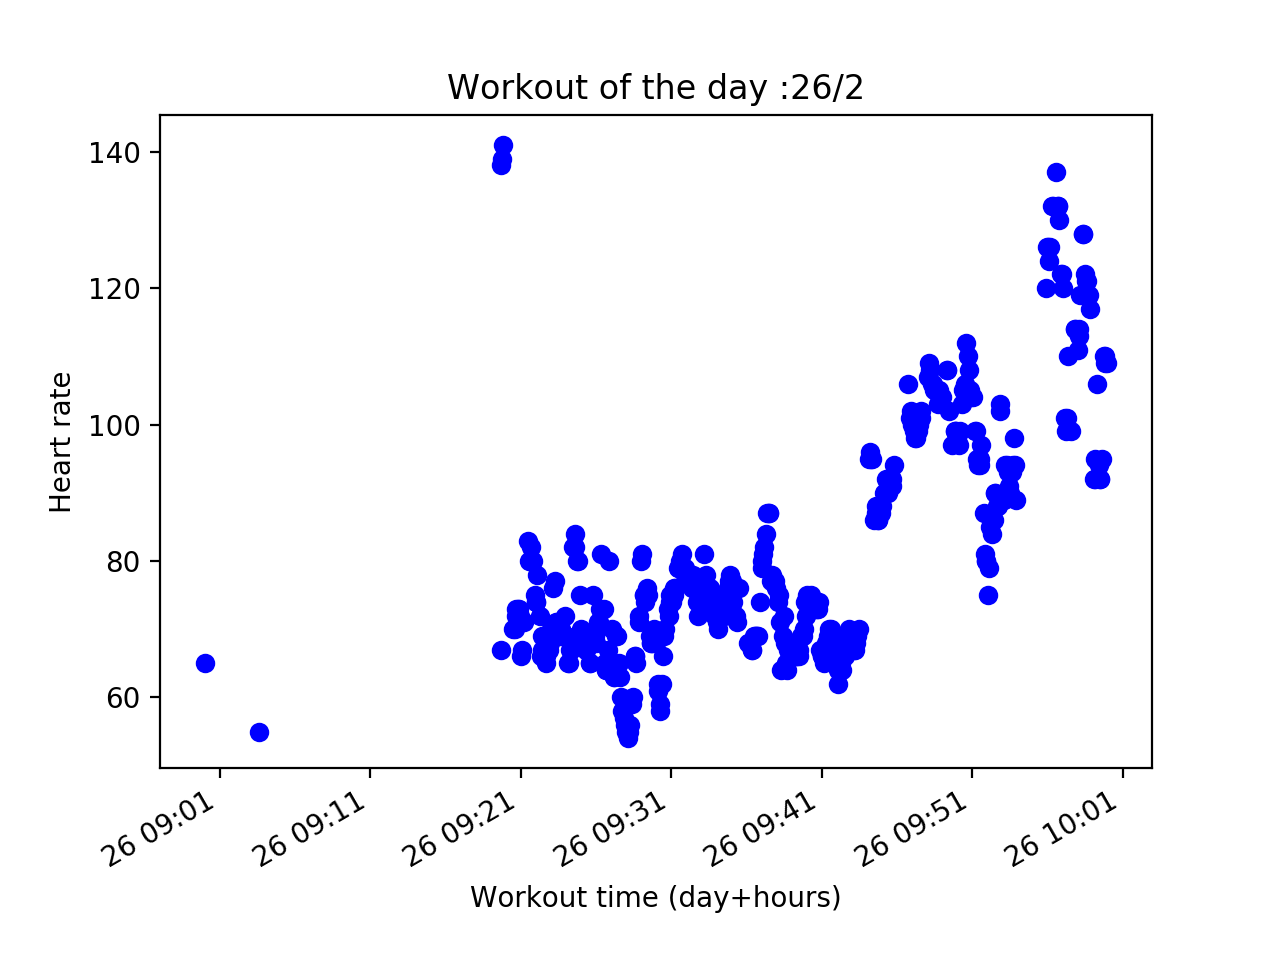

<IPython.core.display.Javascript object>


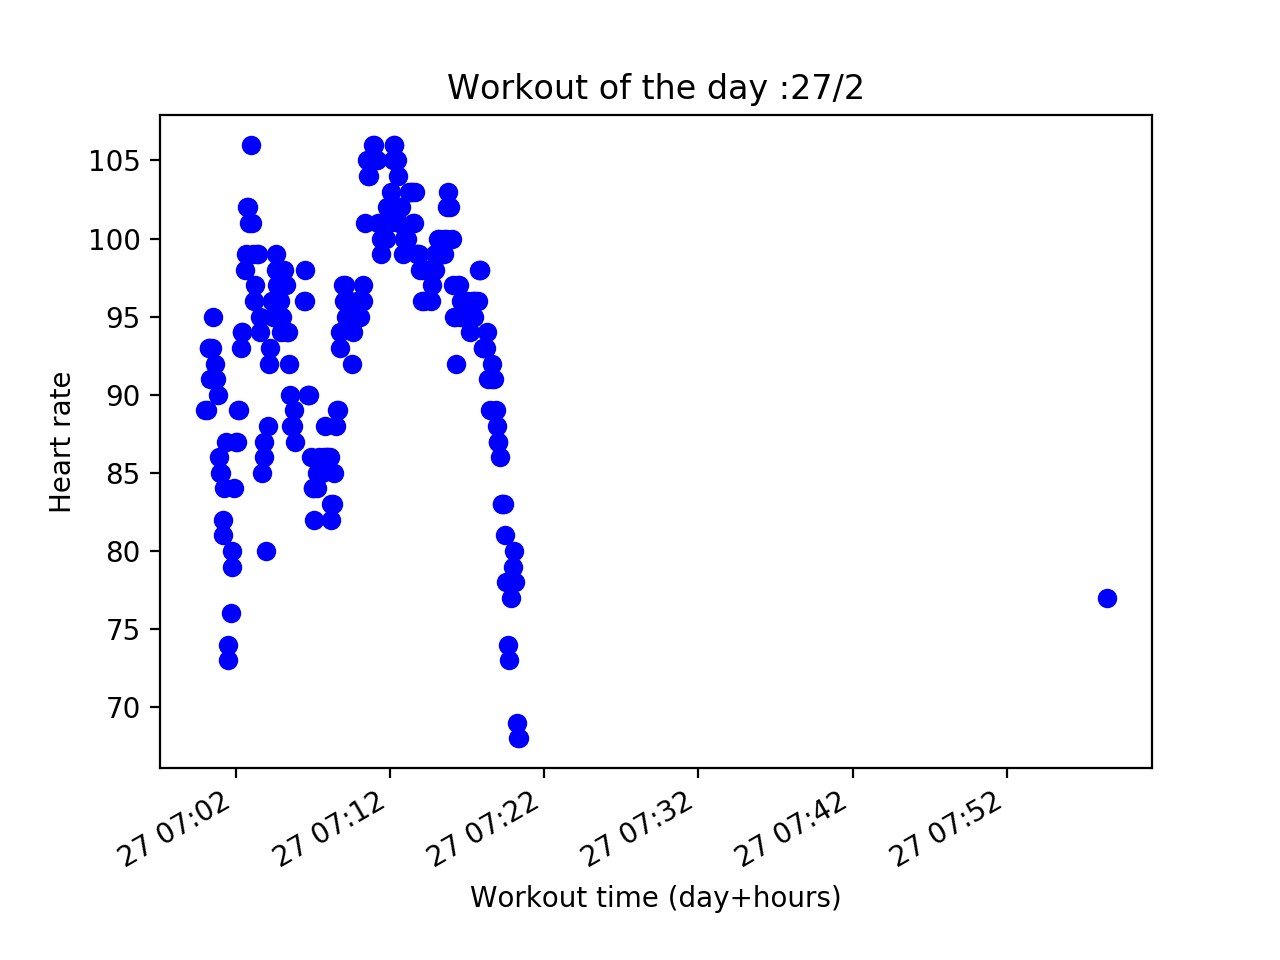

In [238]:
from datetime import date
#Problem with March 1,4 , Feb 19,21,22,23,25,28
dates=[3,13,14,15,16,17,18,20,23,26,27]
df_all = pd.DataFrame()   ##it will be useful later . It contains all valid workouts
for i in dates:
    try:
        plt.figure()
        if i in [13,14,15,18,20,27,]:
            df_plot = df_week_days[df_week_days.index.day==i]
            df_all = df_all.append(df_plot)
        else:
            if i in [16,17,26,3]:
                df_plot = df_weekend[df_weekend.index.day==i]
                df_all = df_all.append(df_plot)
        plt.plot(df_plot.index,df_plot.value, 'bo')
        plt.title('Workout of the day :'+str(df_plot.index[i].day)+'/'+str(df_plot.index[i].month))
        plt.xlabel('Workout time (day+hours)')
        plt.ylabel('Heart rate')
        plt.gcf().autofmt_xdate()
        plt.show()
    except:
        pass

# III- Problems to raise with those data

In [230]:
df_all.describe()

,value
count,2614.000000
mean,87.903979
std,12.903998
min,48.000000
25%,79.000000
50%,89.000000
75%,96.750000
max,141.000000


### A) Inconsistency between files : Workout.csv and Heart Rate.csv

Indeed, we can notice that there is no data available for : March 1,4 , Feb 19,21,22,25,28,23 in the Heart Rate.csv file. However, in the Workout.csv , we clearly see that the workouts have been recorded.


In [231]:
#Workout file:
df_w= pd.read_csv('Workout.csv')
df_w.set_index('startDate',inplace=True)
df_w.index=pd.to_datetime(df_w.index)
errors=[19,21,23,25,28,1]
df_w[df_w.index.day.isin(errors)] 

,sourceName,sourceVersion,device,creationDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit
startDate,,,,,,,,,,,,
2019-02-19 05:54:52,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312cc30>, name:Apple Watch, ma...",2019-02-19 07:59:05 +0100,2019-02-19 07:59:04 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,64.196292,min,0.0,mi,329.342024,kcal
2019-02-19 09:07:45,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312cdc0>, name:Apple Watch, ma...",2019-02-19 11:45:33 +0100,2019-02-19 11:45:31 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,97.759313,min,0.0,mi,449.896855,kcal
2019-02-21 05:56:07,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312cfa0>, name:Apple Watch, ma...",2019-02-21 08:17:55 +0100,2019-02-21 07:43:21 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,47.230787,min,0.0,mi,257.480526,kcal
2019-02-23 08:04:06,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312d130>, name:Apple Watch, ma...",2019-02-23 10:13:40 +0100,2019-02-23 10:13:38 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,69.544757,min,0.0,mi,440.852760,kcal
2019-02-25 05:54:49,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312d1d0>, name:Apple Watch, ma...",2019-02-25 08:03:36 +0100,2019-02-25 08:03:35 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,68.763058,min,0.0,mi,438.688783,kcal
2019-02-28 05:59:49,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312d5e0>, name:Apple Watch, ma...",2019-02-28 07:57:45 +0100,2019-02-28 07:57:45 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,57.920993,min,0.0,mi,441.891099,kcal
2019-03-01 05:56:40,Tazi’s Apple Watch,5.1.3,"<<HKDevice: 0x28312d680>, name:Apple Watch, ma...",2019-03-01 07:59:18 +0100,2019-03-01 07:59:17 +0100,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.621250,min,0.0,mi,368.749375,kcal


In [232]:
#Heart Rate File
df_hr= pd.read_csv('HeartRate.csv')
df_hr.set_index('startDate',inplace=True)
df_hr.index=pd.to_datetime(df_hr.index)
errors = [19,21,22,23,25,28,1,4]
for e in errors:
    df_error = df_hr[df_hr.index.day == e] 
    mask_weekdays = (df_error.index.hour>6) & (df_error.index.hour<8)
    df_error = df_error[mask_weekdays]
    if len(df_error)==0:
        print('For day '+str(e)+', there is no data')
    else:
        print('For day '+str(e)+' , it started at : '+str(df_error.index.min())+' ,it ended at : '+str(df_error.index.max()))

For day 19, there is no data
For day 21, there is no data
For day 22 , it started at : 2019-02-22 07:00:00 ,it ended at : 2019-02-22 07:05:11
For day 23, there is no data
For day 25, there is no data
For day 28, there is no data
For day 1 , it started at : 2019-03-01 07:00:02 ,it ended at : 2019-03-01 07:02:32
For day 4 , it started at : 2019-03-04 07:00:02 ,it ended at : 2019-03-04 07:04:27


##### As we can see, most of the time there is no data or the workout has been recorded for less than 5 minutes!

### B) Inconsistency in terms of number of points recorded

Here, we will plot the histogram of number of points recorded during one hour to show that there is a lot of differences

In [233]:
list_valid_days = df_all.index.day.unique().tolist()
list_valid_days
#check if we have all workout days : OK
#This is the dataframe containing only the valid workouts

[3, 13, 14, 15, 16, 17, 18, 20, 26, 27]

<IPython.core.display.Javascript object>


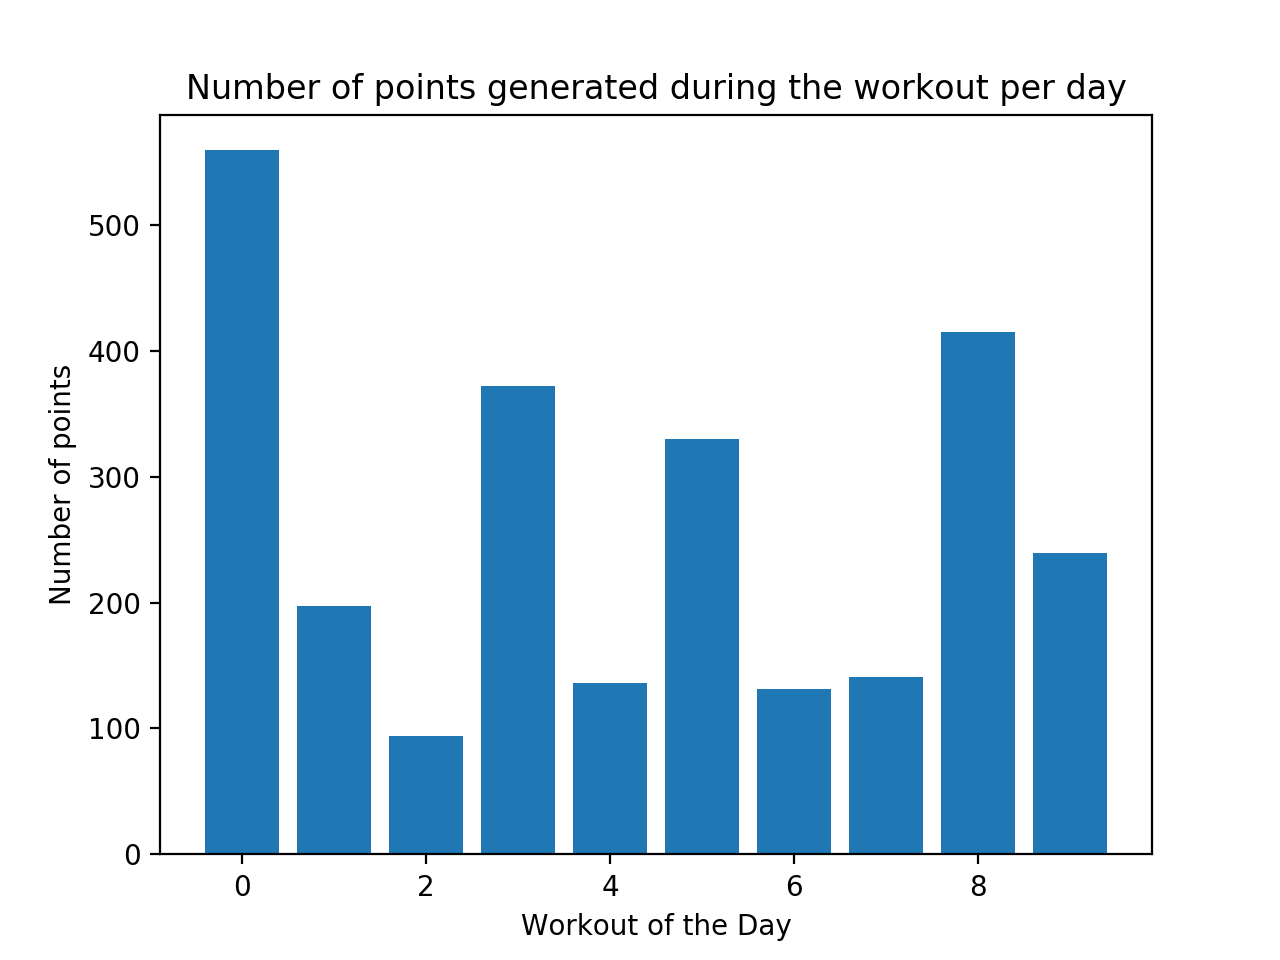

In [239]:
y=[df_all[df_all.index.day == day].count() for day in list_valid_days]
plt.figure()
plt.bar([i for i in range(len(y))],y)
plt.xlabel('Workout of the Day')
plt.ylabel('Number of points')
plt.title ('Number of points generated during the workout per day')
plt.show()

#### We can clearly see the variability in terms of data generated!

### C) Other description metrics

We will look at the mean , the sandard deviation and the min and max value of the heart rate generated during the workouts

In [235]:
df_all.describe()
#This gives us an overview for all the workouts.

,value
count,2614.000000
mean,87.903979
std,12.903998
min,48.000000
25%,79.000000
50%,89.000000
75%,96.750000
max,141.000000


Let's plot those metrics for each workout

<IPython.core.display.Javascript object>


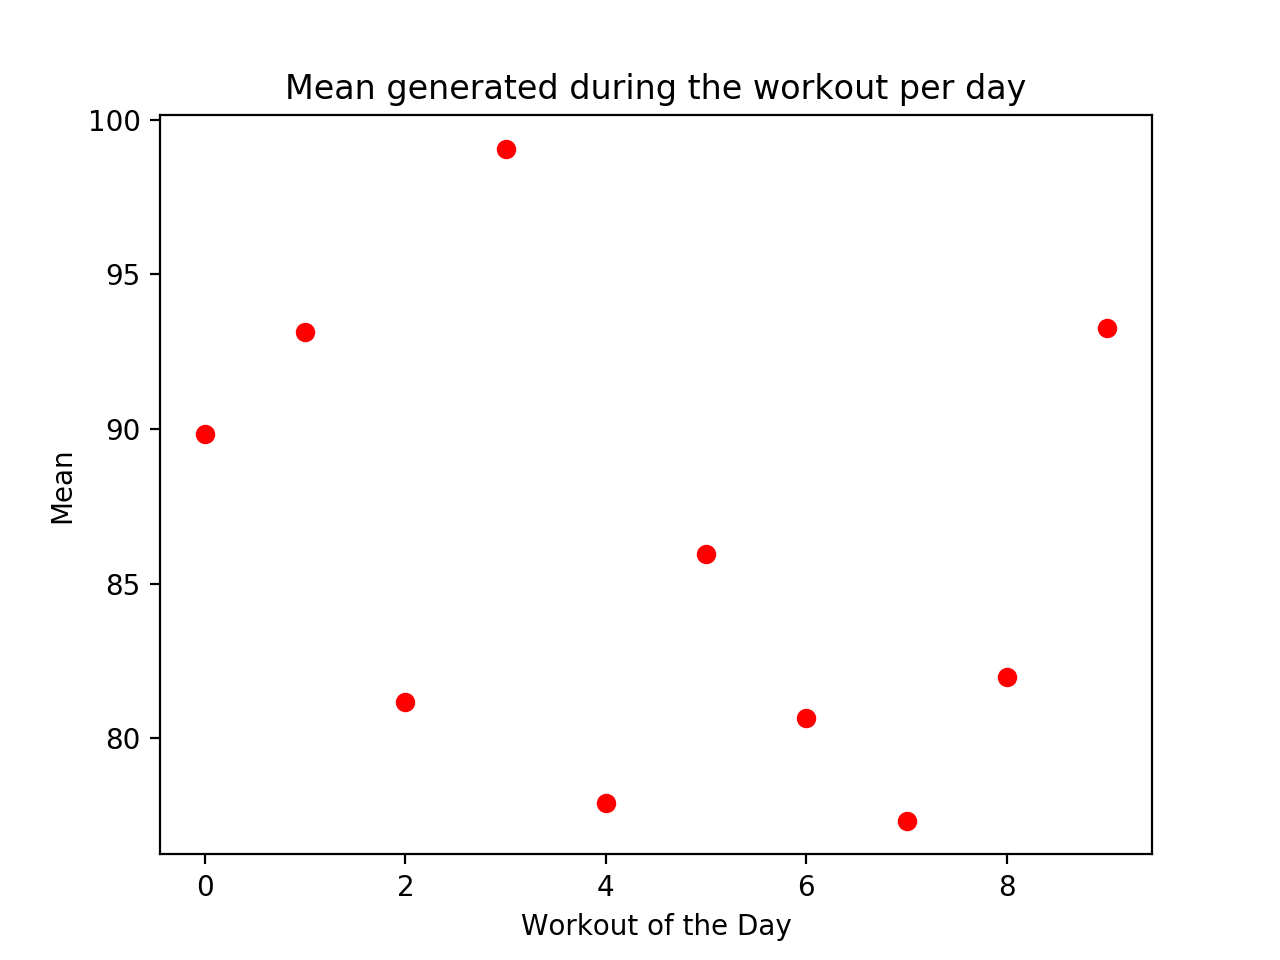

<IPython.core.display.Javascript object>


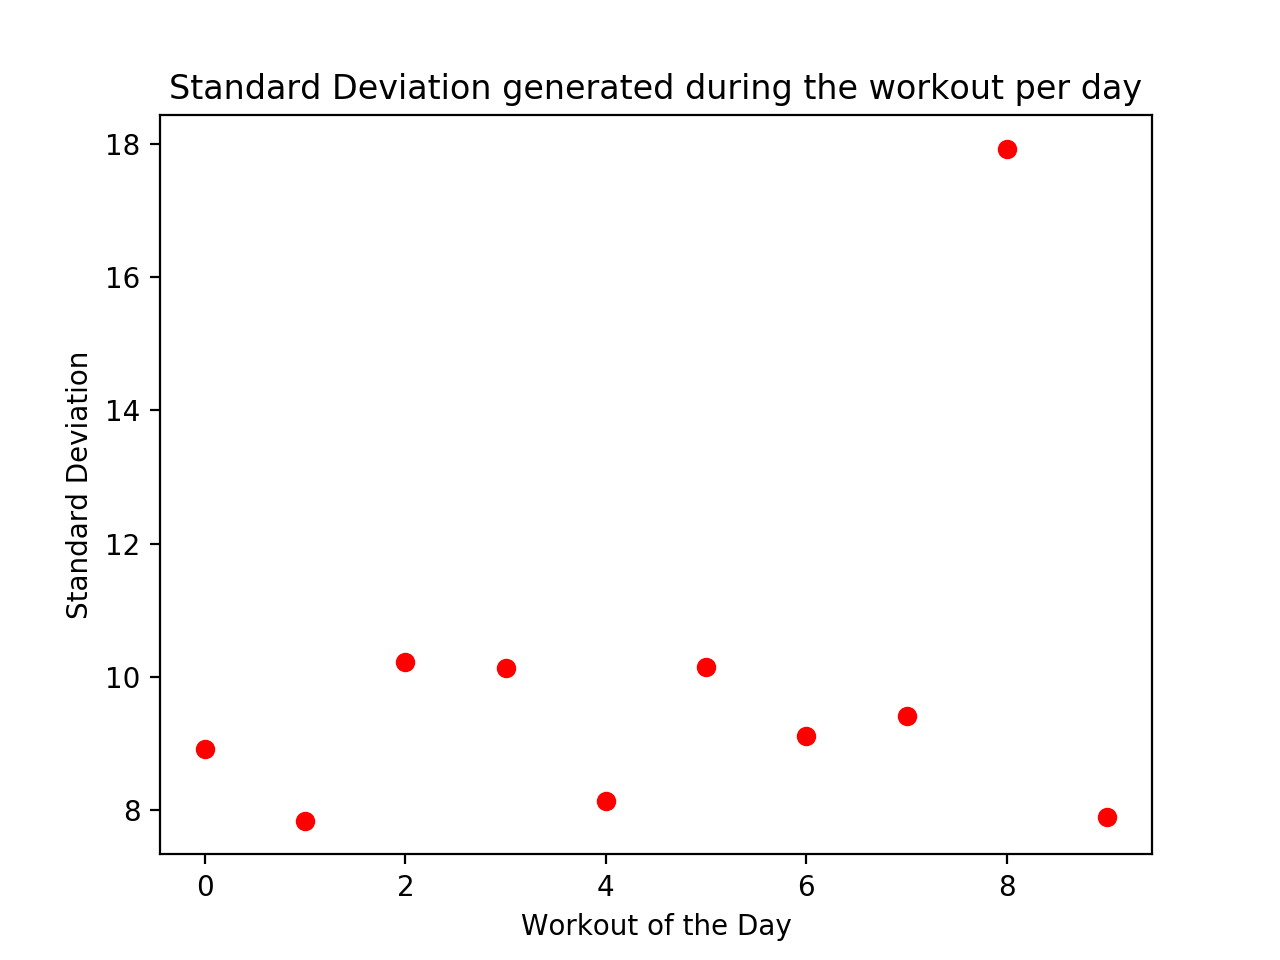

<IPython.core.display.Javascript object>


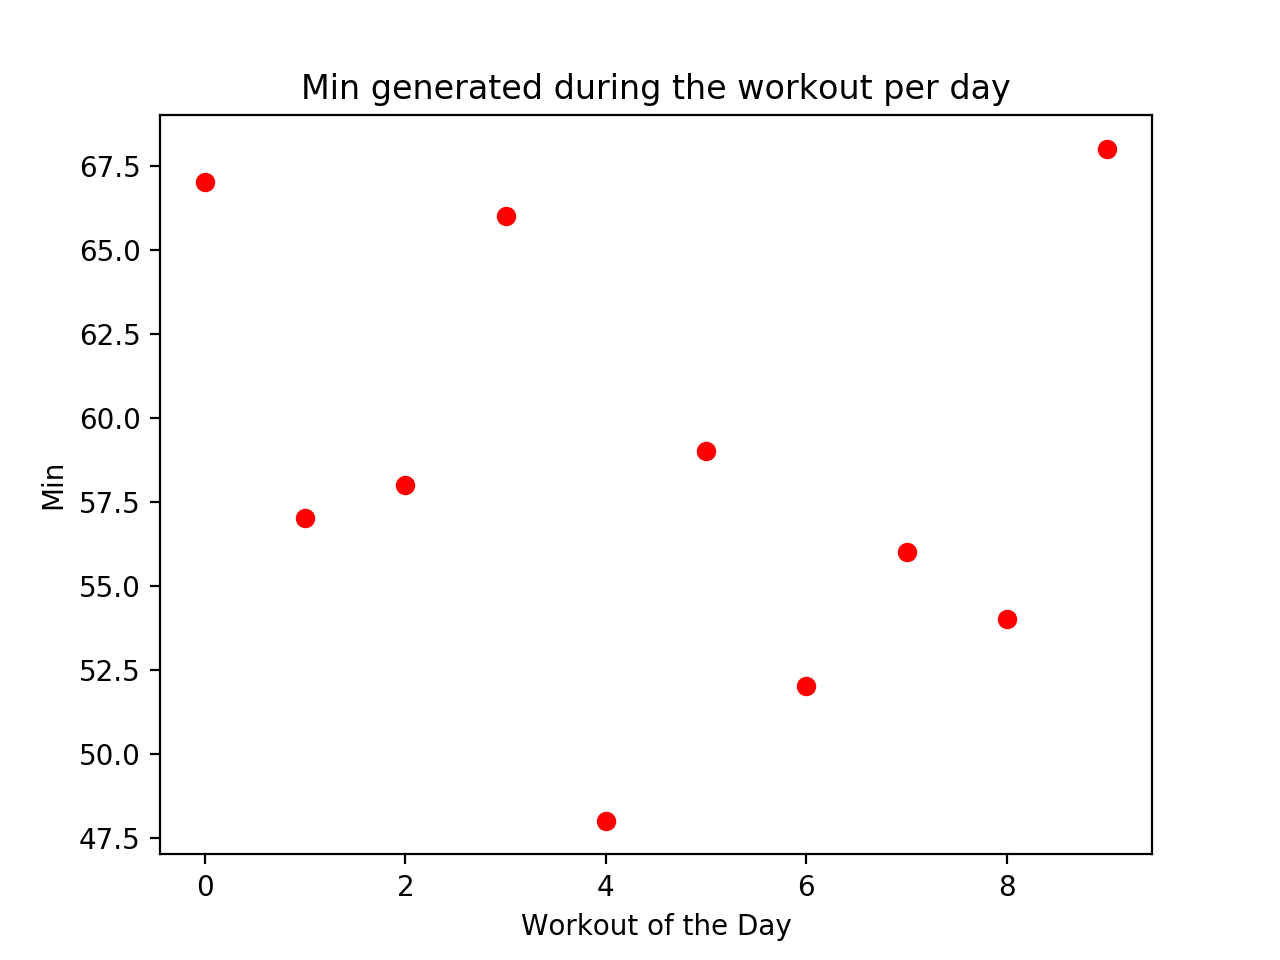

<IPython.core.display.Javascript object>


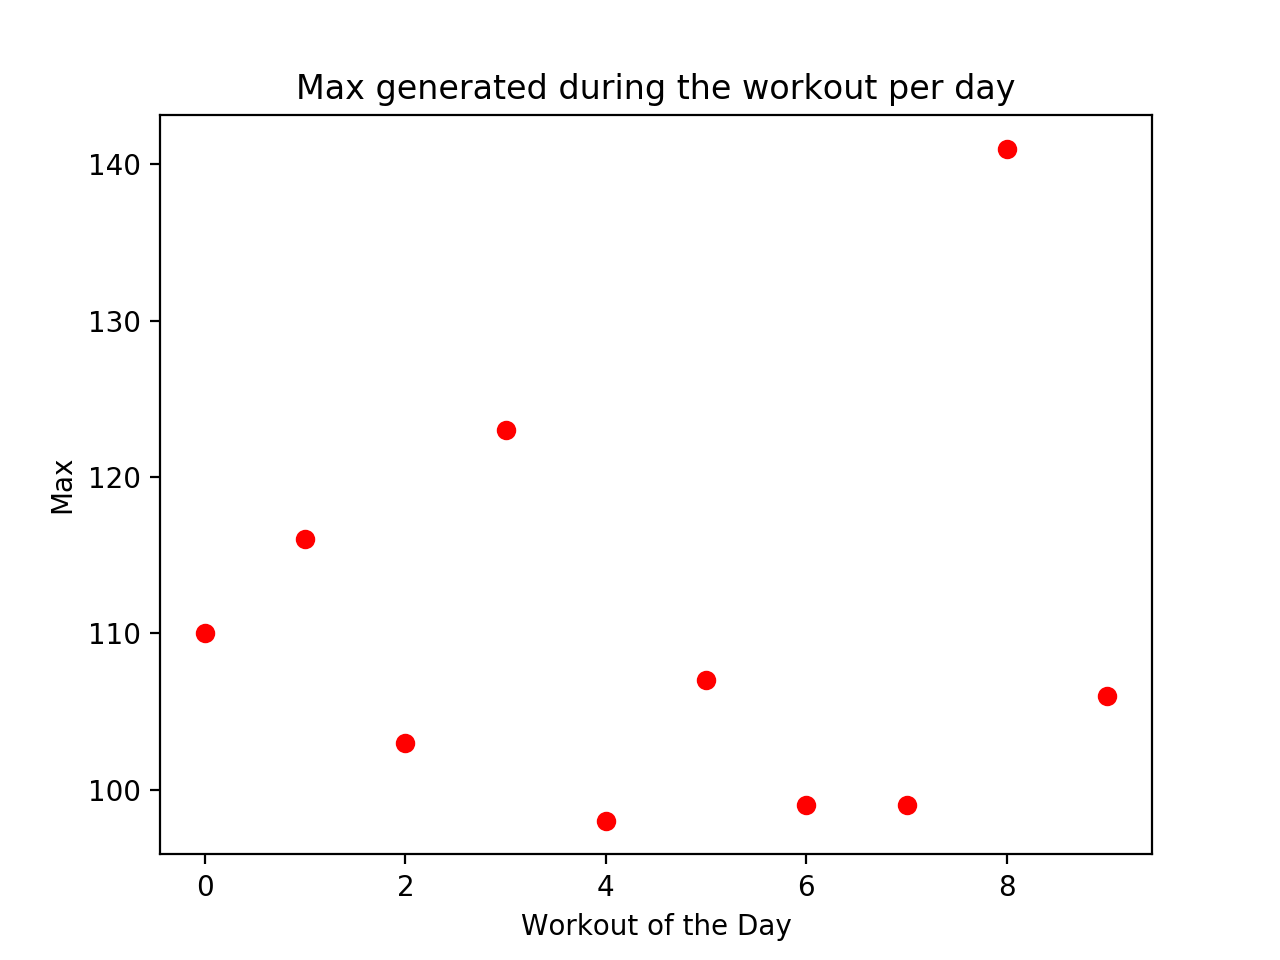

In [240]:
y_mean=[df_all[df_all.index.day == day].mean() for day in list_valid_days]
y_std=[df_all[df_all.index.day == day].std() for day in list_valid_days]
y_min=[df_all[df_all.index.day == day].min() for day in list_valid_days]
y_max=[df_all[df_all.index.day == day].max() for day in list_valid_days]
y_desc=[y_mean,y_std,y_min,y_max]
desc=['Mean','Standard Deviation','Min','Max']
for c,d in enumerate(desc):
    plt.figure()
    plt.plot([i for i in range(len(y_desc[c]))],y_desc[c],'ro')
    plt.xlabel('Workout of the Day')
    plt.ylabel(d)
    plt.title (d+' generated during the workout per day')
    plt.show()